In [1]:
## Minimizing a cost function with 2 indepdendent variables using Gradient Descent
## Code below shows how to use it for minimizing a cost function w0**2 + w1**2

In [6]:
import numpy as np
import yodf as tf
import matplotlib.pyplot as plt

initial_value0 = -2.5
initial_value1 = 2.5
w0 = tf.Variable(initial_value0)
w1 = tf.Variable(initial_value1)
cost = w0**2 + w1**2

learning_rate = 0.01
iterations = 200
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    w0s = []
    w1s = []
    for i in range(iterations):
        cost_final, _, w0_final, w1_final = s.run([cost, train, w0, w1])
        if i%5 == 0:
            w0s.append(w0_final)
            w1s.append(w1_final)
print(f"{w0_final:0.6f}, {w1_final:0.6f}, {cost_final:0.6f}")

-0.043970, 0.043970, 0.004026


<IPython.core.display.Javascript object>


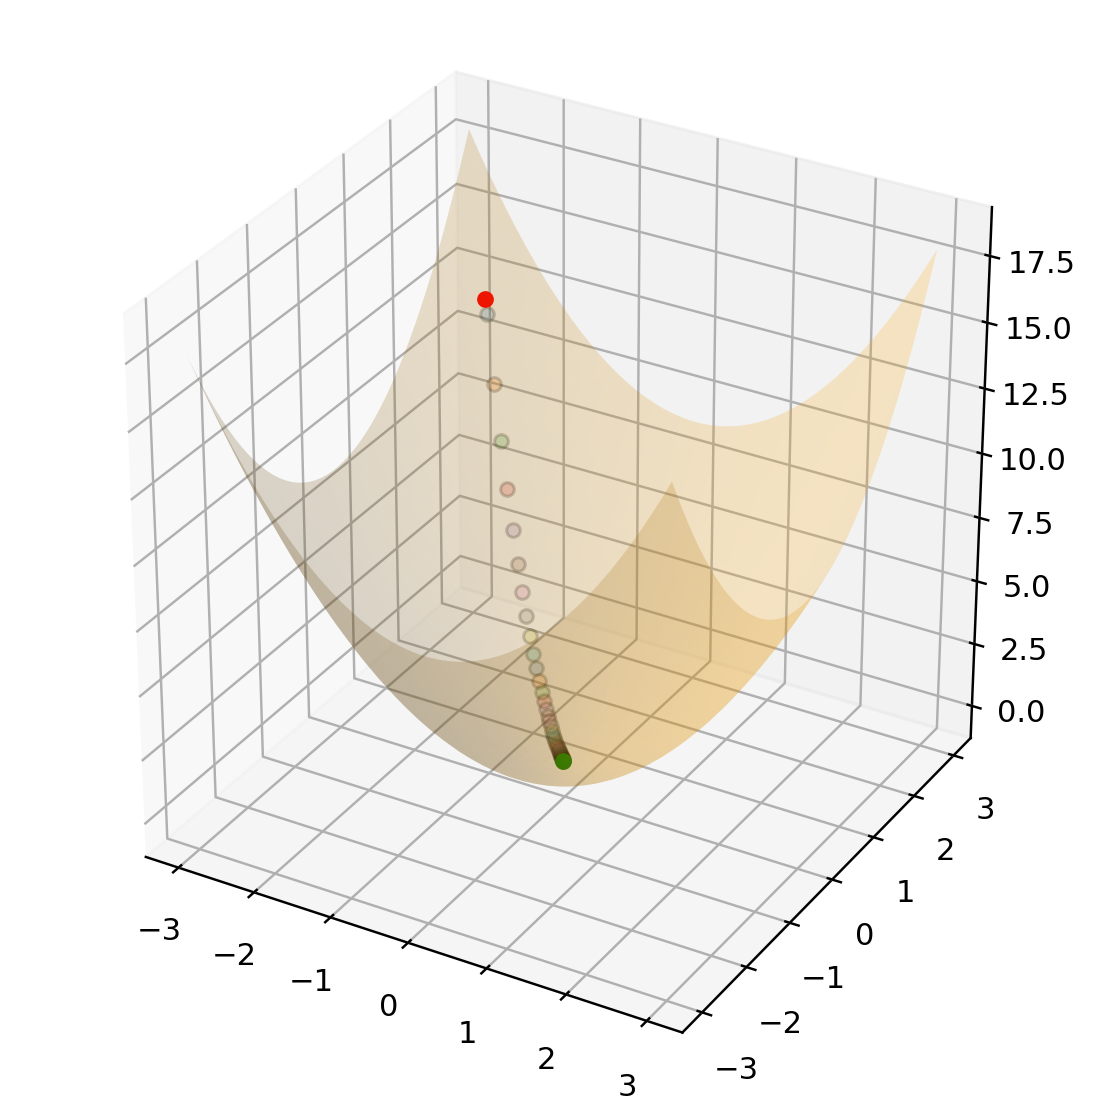

In [7]:
%matplotlib notebook
a = np.linspace(-3, 3)
b = np.linspace(-3, 3)
a, b = np.meshgrid(a, b)

def f(w0, w1):
    return np.power(w0, 2) + np.power(w1, 2)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

z = f(a, b)

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.plot_surface(a, b, z, color='orange', alpha=0.2)
ax.scatter(initial_value0, initial_value1, f(initial_value0, initial_value1), color='r')
for i in range(len(w0s)):
    ax.scatter(w0s[i], w1s[i], f(w0s[i], w1s[i]), facecolor=None, alpha=0.2, edgecolor='black')
ax.scatter(w0_final, w1_final, f(w0_final, w1_final), color='g')
plt.show()